In [1]:
from functions.data_functions import load_data, load_pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import arviz as az
import numpy as np

## Read in data and preprocess data

In [2]:
pca_df = load_data('BEACON', 'pca_data')

In [3]:
comp = ['comp_1', 'comp_2','comp_3']

In [4]:
for component in comp:
    pca_df[f'{component}_t1_demean'] = pca_df[f'{component}_t1'] - pca_df[f'{component}_t1'].mean()

pca_df['group_ind'] = pca_df['group'].apply(lambda group: 0 if group =='HC' else 1)

In [5]:
pca_df

,index,participant,comp_1_t1,comp_2_t1,comp_3_t1,comp_1_t2,comp_2_t2,comp_3_t2,group,comp_1_t1_demean,comp_2_t1_demean,comp_3_t1_demean,group_ind
0,0,G1001,-3.319774,-0.009623,-0.988172,NaN,NaN,NaN,HC,-3.319774,-0.009623,-0.988172,0
1,1,G1002,-2.913537,0.070571,-0.299912,-3.557486,-0.645033,-0.684848,HC,-2.913537,0.070571,-0.299912,0
2,2,G1004,-2.330221,0.827119,0.029195,2.387995,0.810593,1.188566,HC,-2.330221,0.827119,0.029195,0
3,3,G1008,-2.865158,0.610074,0.846223,NaN,NaN,NaN,HC,-2.865158,0.610074,0.846223,0
4,4,G1010,-3.549291,-0.476134,0.393326,NaN,NaN,NaN,HC,-3.549291,-0.476134,0.393326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,169,G2137,1.260847,-1.322877,-1.481774,NaN,NaN,NaN,AN,1.260847,-1.322877,-1.481774,1
170,170,G2138,-1.402611,-0.245159,-1.579789,0.222572,-0.068561,-0.319396,AN,-1.402611,-0.245159,-1.579789,1
171,171,G2139,0.710268,0.959405,-1.566979,NaN,NaN,NaN,AN,0.710268,0.959405,-1.566979,1
172,172,G2140,3.275019,-2.019297,-1.381370,4.714841,-1.933827,-0.874109,AN,3.275019,-2.019297,-1.381370,1


## Load pickle objects

In [6]:
t1_models = load_pickle('t1_models')
t2_models = load_pickle('t2_models')
fitted_models = load_pickle('fitted_models_group')
model_summary = load_pickle('model_summary_group')
correlation_coeffients = load_pickle('correlation_coeffients_group')

## Exploatory data analysis

<AxesSubplot: xlabel='group', ylabel='comp_3_t2'>

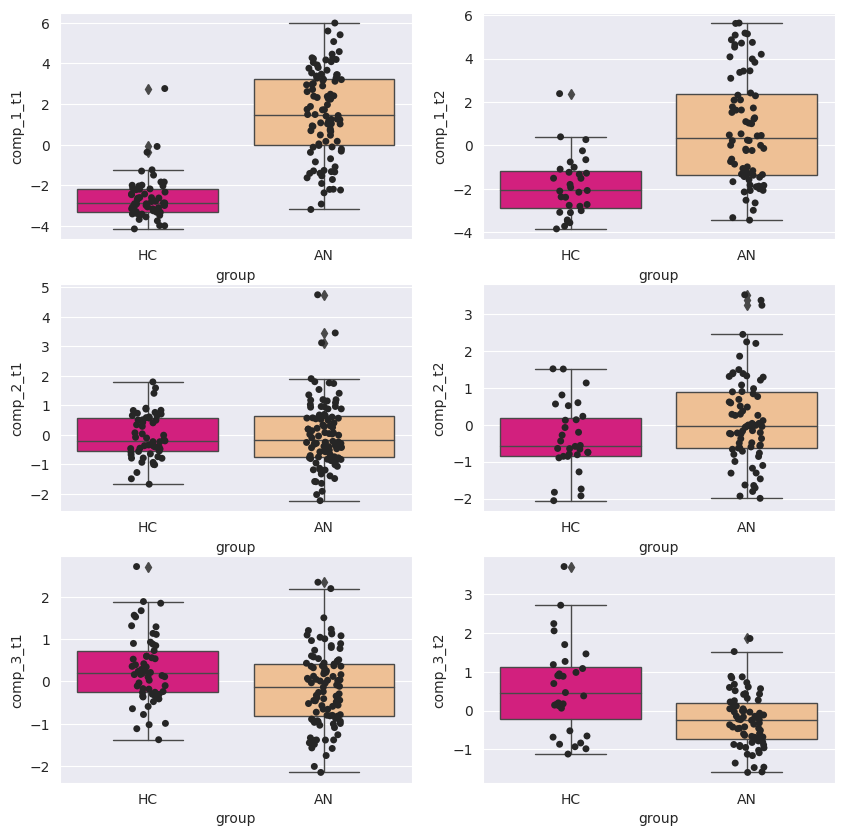

In [7]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.boxplot(x='group', y='comp_1_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[0][0])
sns.stripplot(x="group", y="comp_1_t1", data=pca_df, color=".15", ax=ax[0][0])
sns.boxplot(x='group', y='comp_1_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[0][1])
sns.stripplot(x="group", y="comp_1_t2", data=pca_df, color=".15", ax=ax[0][1])

sns.boxplot(x='group', y='comp_2_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[1][0])
sns.stripplot(x="group", y="comp_2_t1", data=pca_df, color=".15", ax=ax[1][0])
sns.boxplot(x='group', y='comp_2_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[1][1])
sns.stripplot(x="group", y="comp_2_t2", data=pca_df, color=".15", ax=ax[1][1])

sns.boxplot(x='group', y='comp_3_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[2][0])
sns.stripplot(x="group", y="comp_3_t1", data=pca_df, color=".15", ax=ax[2][0])
sns.boxplot(x='group', y='comp_3_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[2][1])
sns.stripplot(x="group", y="comp_3_t2", data=pca_df, color=".15", ax=ax[2][1])

<AxesSubplot: >

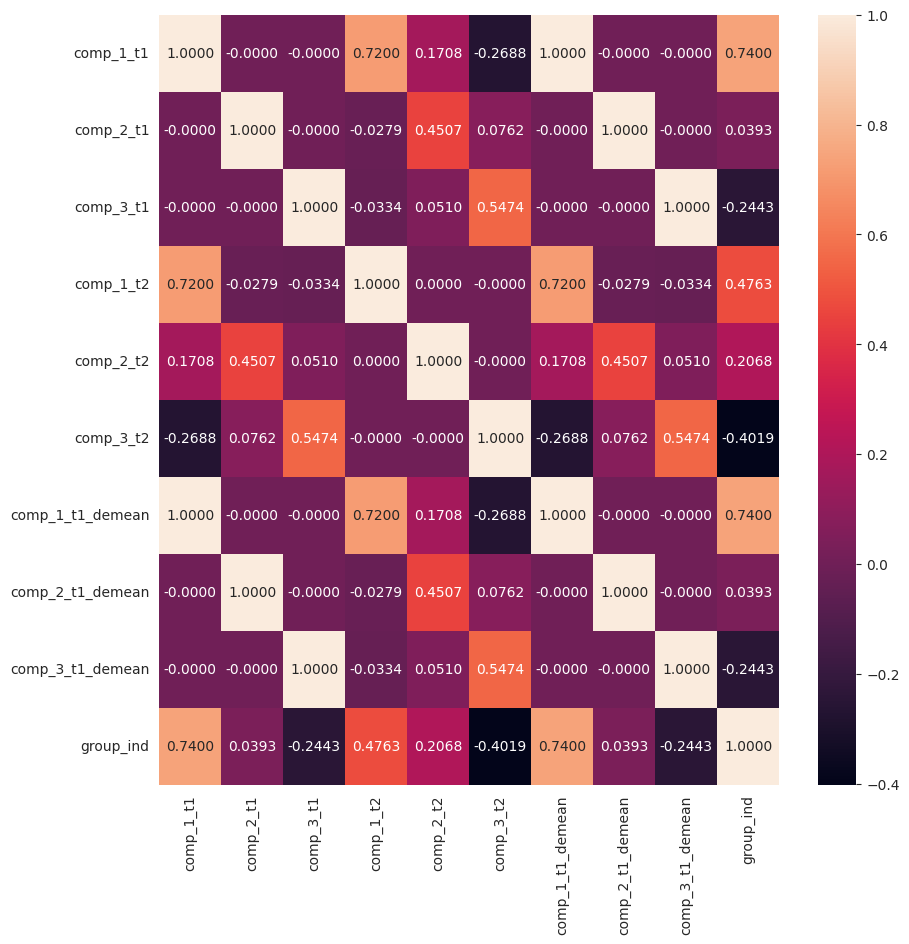

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(pca_df[['comp_1_t1','comp_2_t1', 'comp_3_t1', 'comp_1_t2', 'comp_2_t2', 'comp_3_t2', 'comp_1_t1_demean', 'comp_2_t1_demean', 'comp_3_t1_demean','group_ind']].corr(),  annot=True,  fmt=".4f")

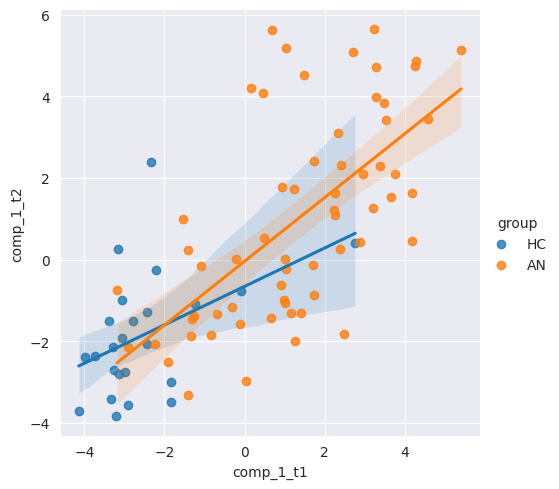

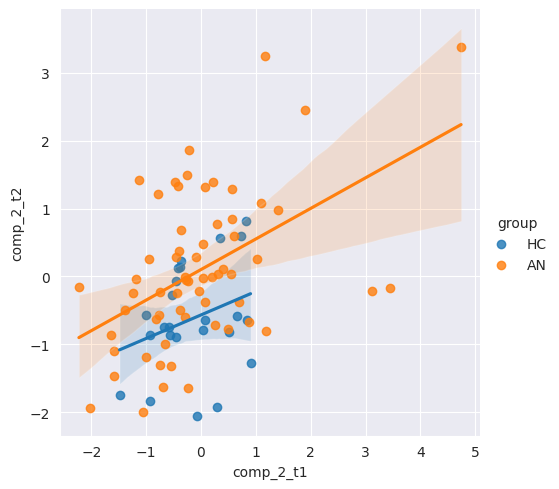

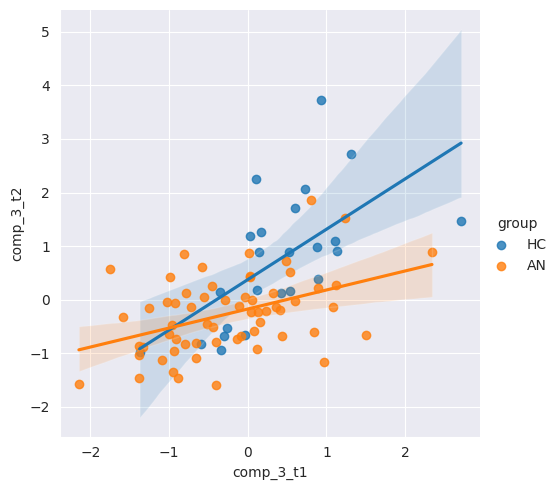

In [9]:
for component in comp:
    sns.lmplot(x=f'{component}_t1', y=f'{component}_t2', hue='group', data=pca_df)

In [10]:
groups = pca_df.groupby('group')
hc = groups.get_group('HC')
an = groups.get_group('AN')

for compent in comp:
    print('HC t1', compent, 'mean', hc[f'{compent}_t1_demean'].mean(), 'std', hc[f'{compent}_t1_demean'].std())
    print('HC t2', compent, 'mean', hc[f'{compent}_t2'].mean(), 'std', hc[f'{compent}_t2'].std(),'\n')
    print('AN t1', compent, 'mean', an[f'{compent}_t1_demean'].mean(), 'std', an[f'{compent}_t1_demean'].std())
    print('AN t2', compent, 'mean', an[f'{compent}_t2'].mean(), 'std', an[f'{compent}_t2'].std(),'\n')

HC t1 comp_1 mean -2.6221028207313446 std 1.0894600051752776
HC t2 comp_1 mean -1.8651117070124732 std 1.3945444139693015 

AN t1 comp_1 mean 1.525100620221292 std 2.143431830397545
AN t2 comp_1 mean 0.7813305799646846 std 2.5185224513491025 

HC t1 comp_2 mean -0.05222664910123818 std 0.7545537811431108
HC t2 comp_2 mean -0.3697322586455445 std 0.9352916186263014 

AN t1 comp_2 mean 0.03037672447725076 std 1.1429178123126638
AN t2 comp_2 mean 0.15488783808124157 std 1.2183631111969089 

HC t1 comp_3 mean 0.2833799492934165 std 0.8146924394274816
HC t2 comp_3 mean 0.5774921193002247 std 1.1613704210113942 

AN t1 comp_3 mean -0.16482303173188512 std 0.8901486930369912
AN t2 comp_3 mean -0.2419223743014456 std 0.6990774687290647 



## Difference at time point one

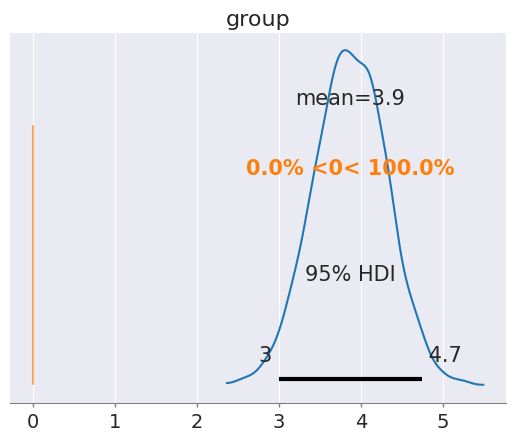

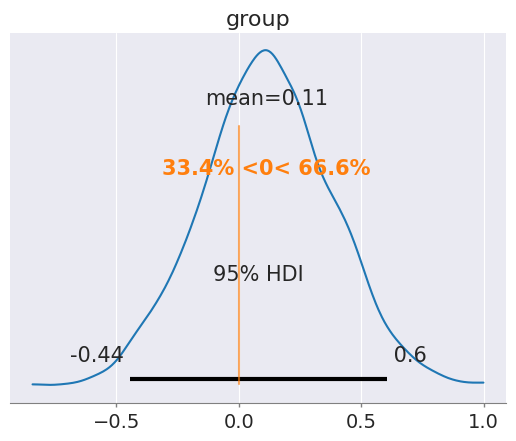

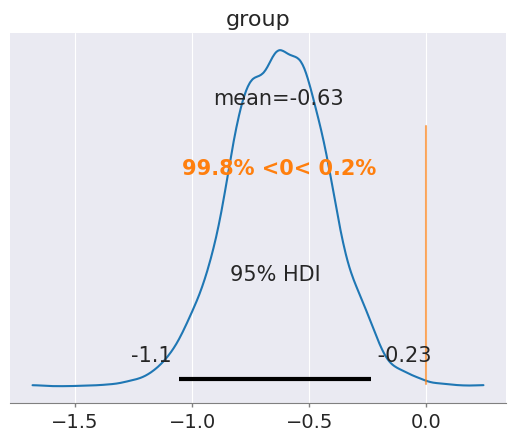

In [11]:
for model in t1_models.keys():
    post_group = t1_models[model].posterior["group"]
    diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
    az.plot_posterior(diff, ref_val=0, hdi_prob=0.95)

## Difference at time point two

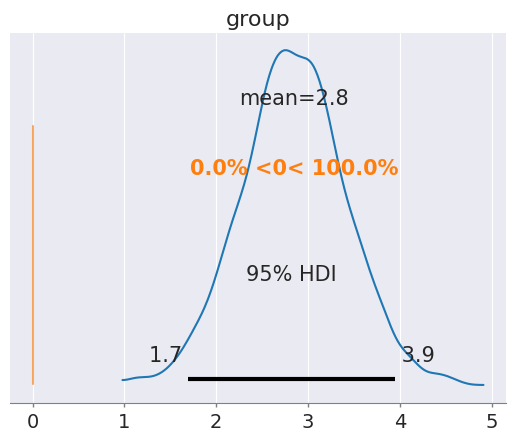

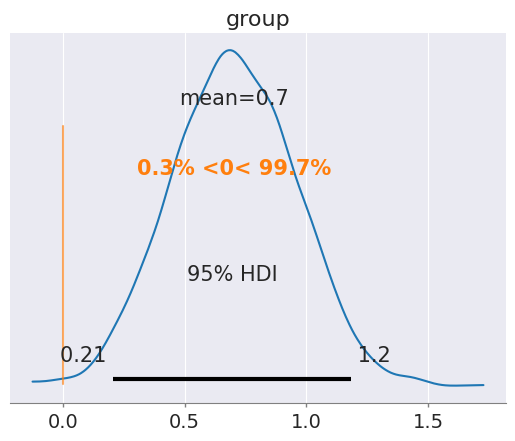

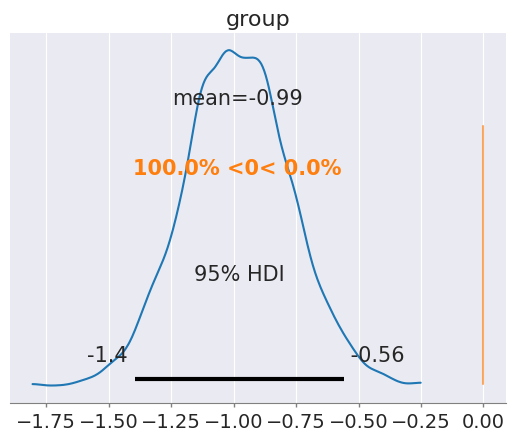

In [12]:
for model in t2_models.keys():
    post_group = t2_models[model].posterior["group"]
    diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
    az.plot_posterior(diff, ref_val=0, hdi_prob=0.95)

## Predictive models

In [13]:
model_summary['comp_1']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_1_t1_demean,0.577,0.805,-0.805,1.794,0.020,0.014,1933.0,1788.0,1.0
group[AN],-0.029,0.279,-0.474,0.436,0.004,0.004,4877.0,4543.0,1.0
group[HC],-0.494,0.727,-1.586,0.786,0.010,0.008,5107.0,4139.0,1.0
comp_1_t1_demean|group[AN],0.190,0.803,-1.067,1.531,0.020,0.015,1947.0,1808.0,1.0
comp_1_t1_demean|group[HC],-0.044,0.804,-1.376,1.217,0.020,0.015,2003.0,1916.0,1.0
comp_1_t1_demean|group_sigma,0.967,0.999,0.019,2.323,0.022,0.016,1595.0,1695.0,1.0
comp_1_t2_sigma,1.845,0.146,1.611,2.083,0.002,0.002,4428.0,3826.0,1.0


In [14]:
model_summary['comp_2']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_2_t1_demean,0.402,0.786,-0.769,1.654,0.027,0.019,1123.0,1043.0,1.0
group[AN],0.106,0.121,-0.095,0.299,0.002,0.001,4375.0,4610.0,1.0
group[HC],-0.564,0.197,-0.889,-0.245,0.003,0.002,4405.0,4028.0,1.0
comp_2_t1_demean|group[AN],0.046,0.783,-1.259,1.154,0.026,0.019,1136.0,1033.0,1.0
comp_2_t1_demean|group[HC],-0.033,0.786,-1.262,1.161,0.026,0.019,1139.0,1128.0,1.0
comp_2_t1_demean|group_sigma,0.889,0.968,0.015,2.166,0.026,0.018,909.0,820.0,1.0
comp_2_t2_sigma,0.953,0.074,0.830,1.074,0.001,0.001,4800.0,4841.0,1.0


In [15]:
model_summary['comp_3']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_3_t1_demean,0.537,0.966,-0.920,2.097,0.026,0.019,1790.0,1223.0,1.0
group[AN],-0.172,0.101,-0.340,-0.010,0.001,0.001,5763.0,4362.0,1.0
group[HC],0.389,0.178,0.090,0.672,0.002,0.002,5164.0,4259.0,1.0
comp_3_t1_demean|group[AN],-0.169,0.967,-1.774,1.286,0.027,0.020,1740.0,1203.0,1.0
comp_3_t1_demean|group[HC],0.360,0.973,-1.148,1.890,0.027,0.022,1699.0,1183.0,1.0
comp_3_t1_demean|group_sigma,1.278,1.120,0.042,2.822,0.024,0.017,2081.0,3306.0,1.0
comp_3_t2_sigma,0.769,0.060,0.679,0.871,0.001,0.001,5420.0,4818.0,1.0


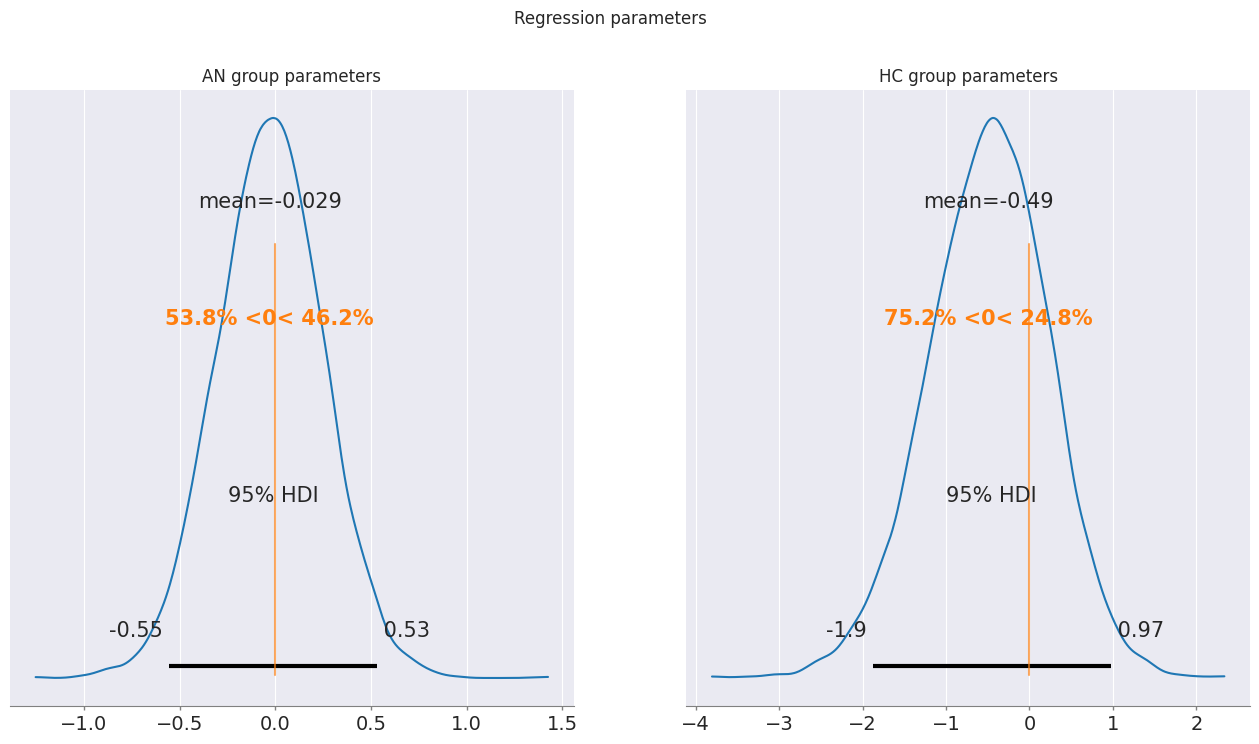

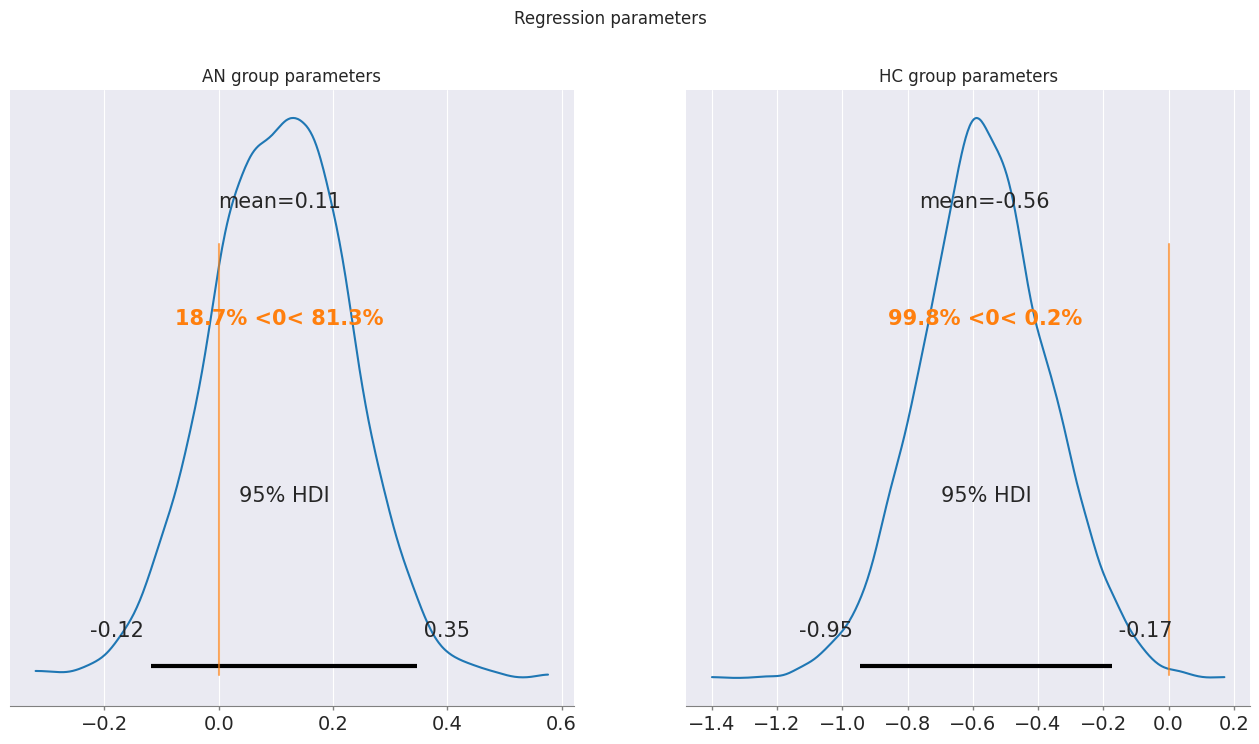

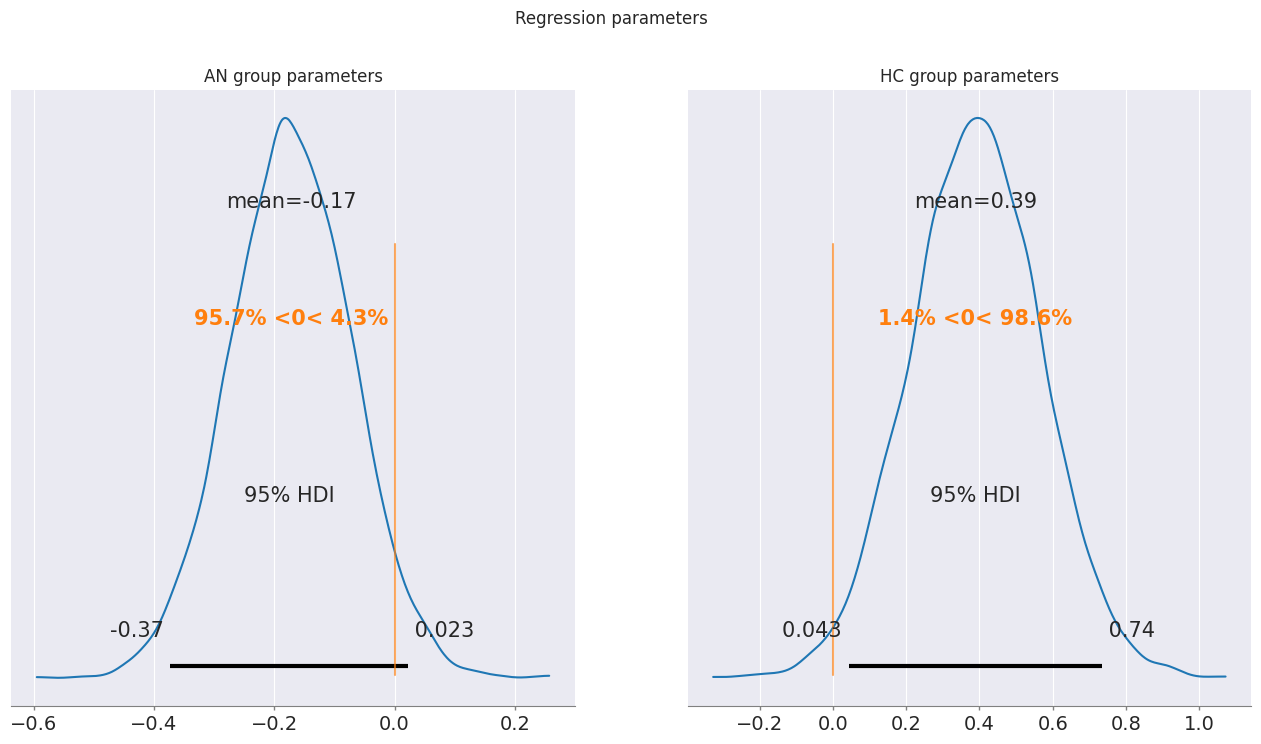

In [16]:
for component in comp:
    fig,ax = plt.subplots(1,2, figsize=(16,8))
    fig.suptitle('Regression parameters')
    group_parameteres = fitted_models['alternative'][component].posterior["group"]
    az.plot_posterior(group_parameteres.sel(group_dim="AN"), ref_val=0, ax = ax[0], hdi_prob=0.95)
    az.plot_posterior(group_parameteres.sel(group_dim="HC"), ref_val=0, ax = ax[1], hdi_prob=0.95)
    ax[0].set_title('AN group parameters')
    ax[1].set_title('HC group parameters')

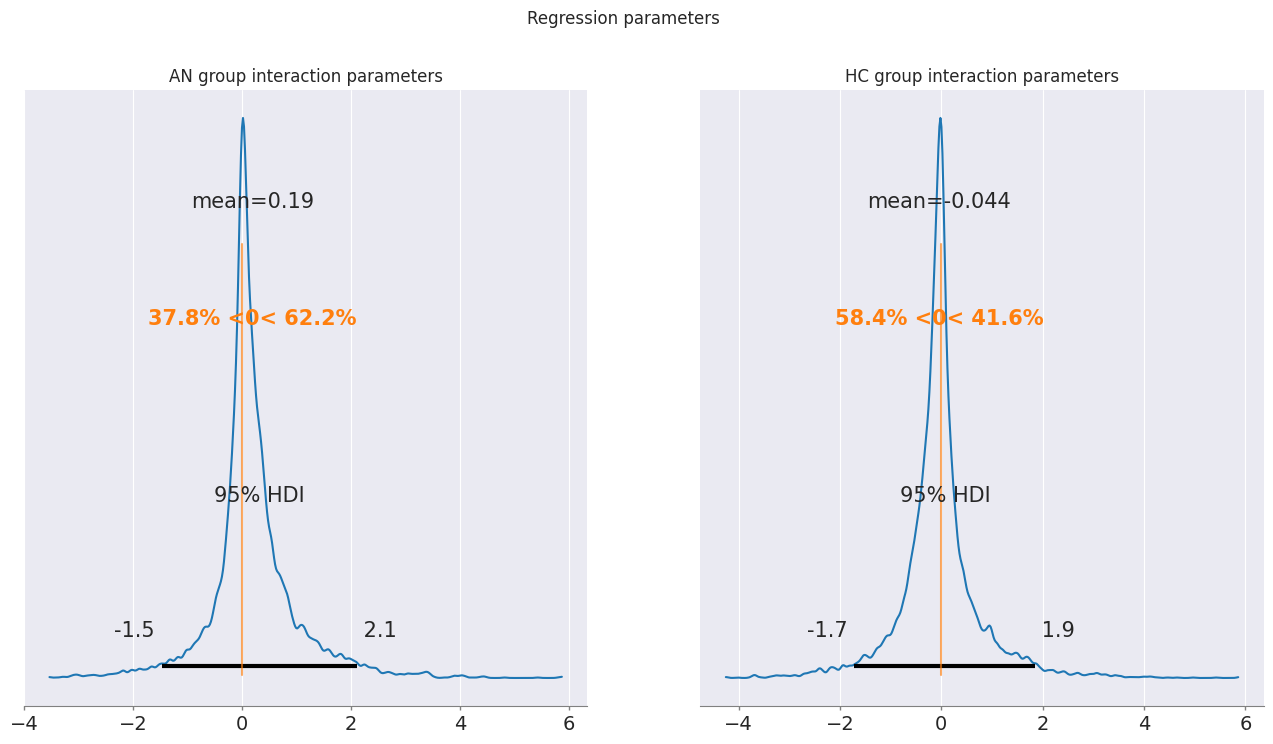

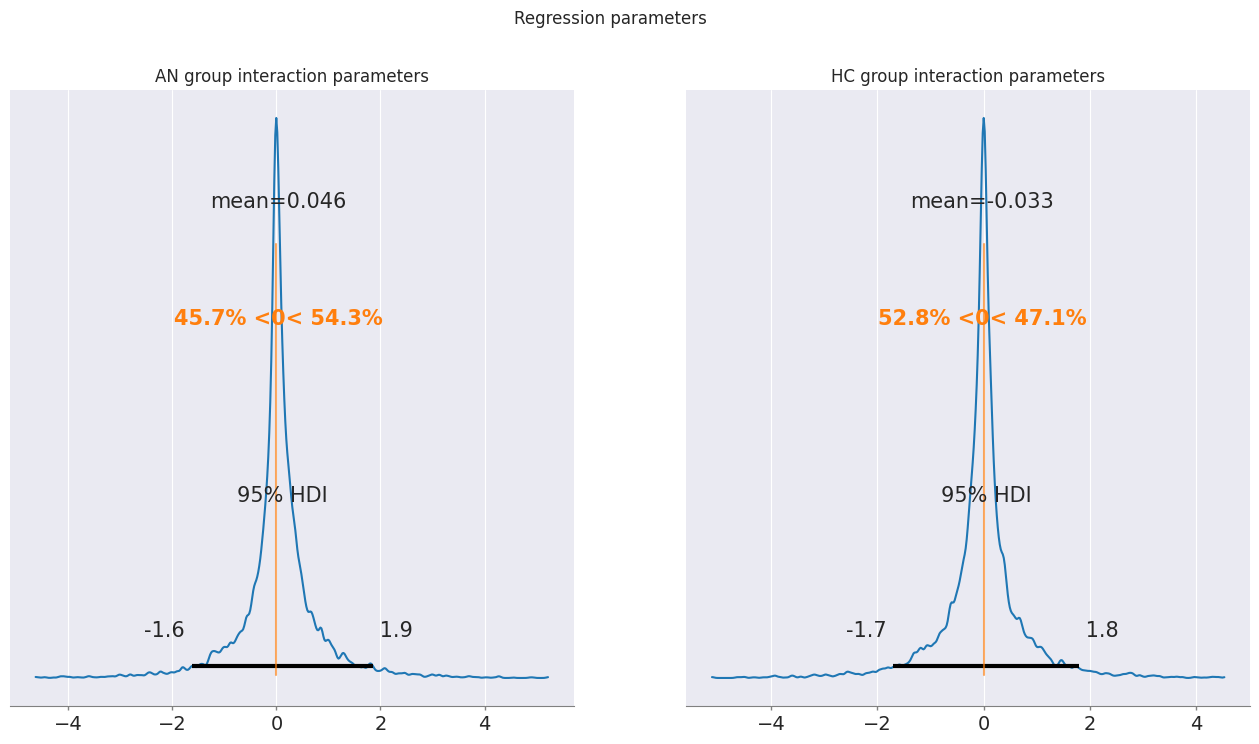

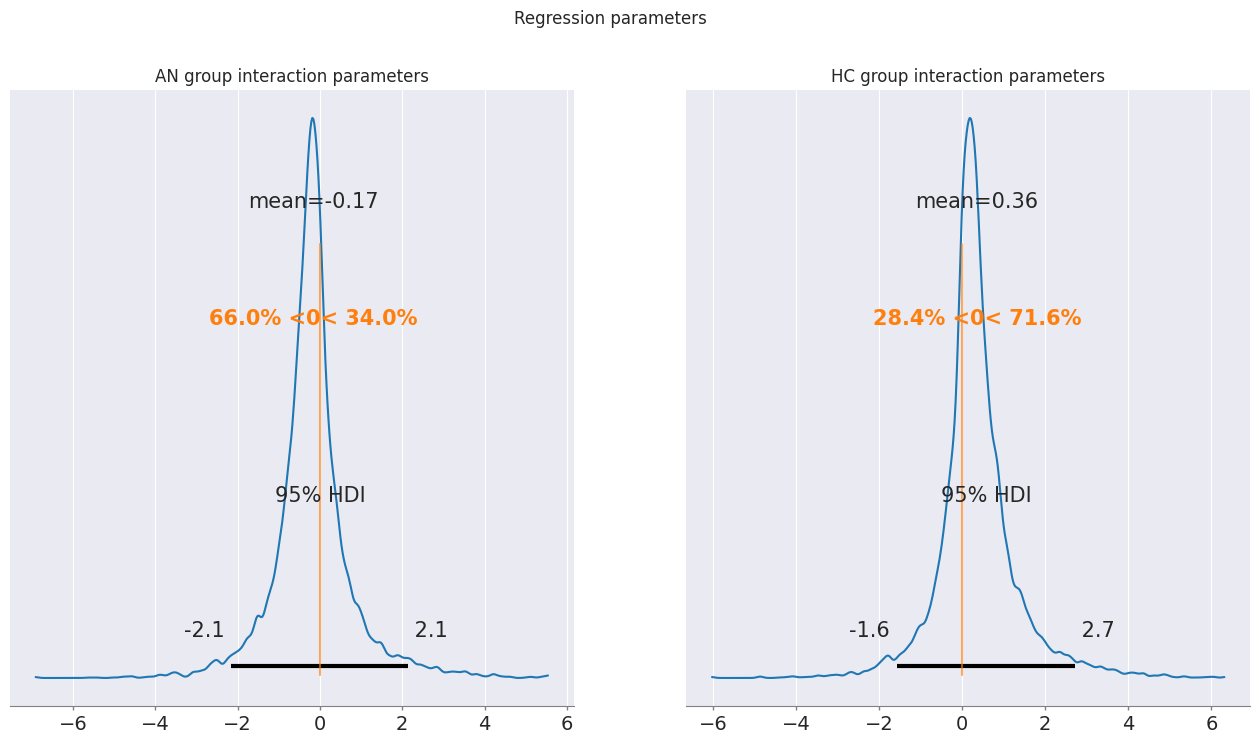

In [17]:
for component in comp:
    fig,ax = plt.subplots(1,2, figsize=(16,8))
    fig.suptitle('Regression parameters')
    group_parameteres = fitted_models['alternative'][component].posterior[f'{component}_t1_demean|group']
    az.plot_posterior(group_parameteres.sel(group__factor_dim="AN"), ref_val=0, ax = ax[0], hdi_prob=0.95)
    az.plot_posterior(group_parameteres.sel(group__factor_dim="HC"), ref_val=0, ax = ax[1], hdi_prob=0.95)
    ax[0].set_title('AN group interaction parameters')
    ax[1].set_title('HC group interaction parameters')

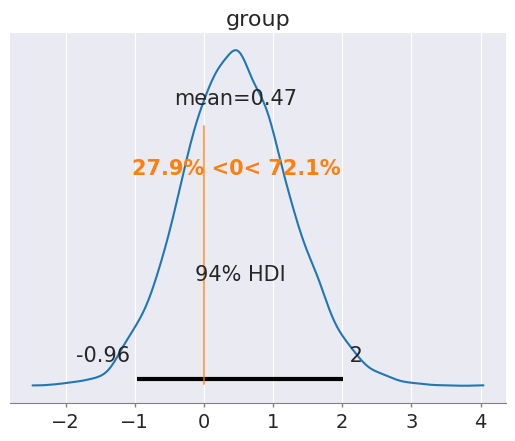

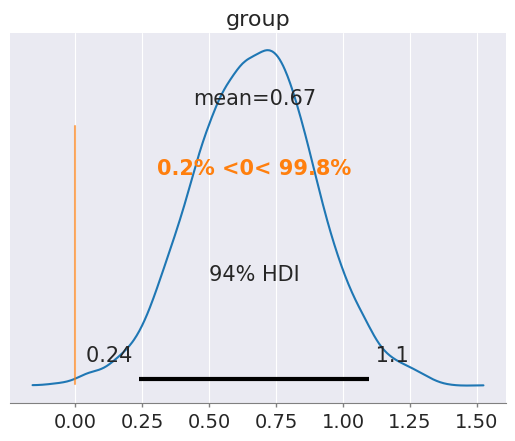

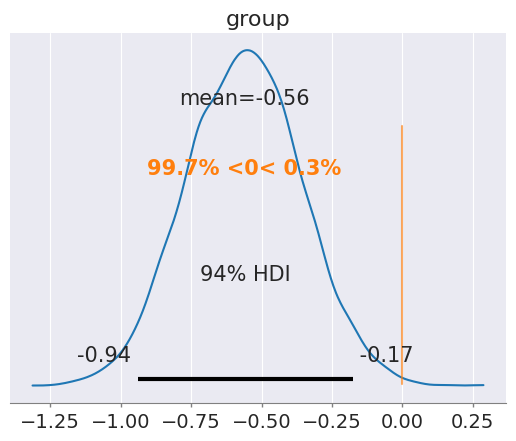

In [18]:
for model in comp:
    post_group = fitted_models['alternative'][model].posterior["group"]
    diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
    az.plot_posterior(diff, ref_val=0)

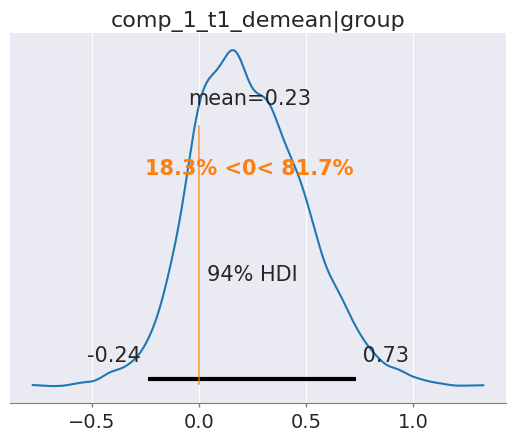

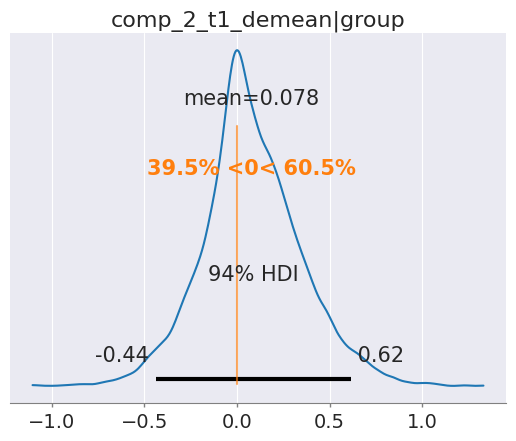

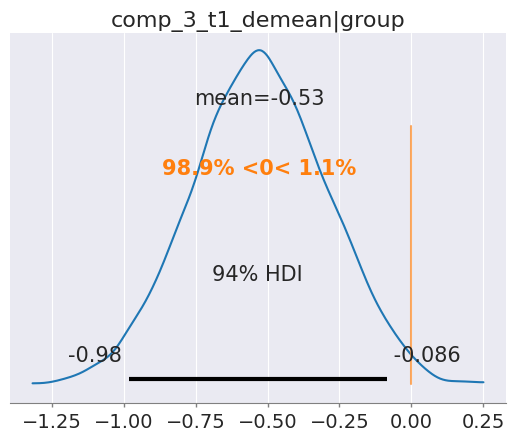

In [19]:
for model in comp:
    post_group = fitted_models['alternative'][model].posterior[f'{model}_t1_demean|group']
    diff = post_group.sel(group__factor_dim="AN") - post_group.sel(group__factor_dim="HC")
    az.plot_posterior(diff, ref_val=0)

## Model comparisons

In [20]:
model_comparisons = {}

for component in comp:
    az_comparison = az.compare({f'null_{component}' : fitted_models['null'][component], f'alternative_{component}': fitted_models['alternative'][component]})
    model_comparisons[component] = az_comparison

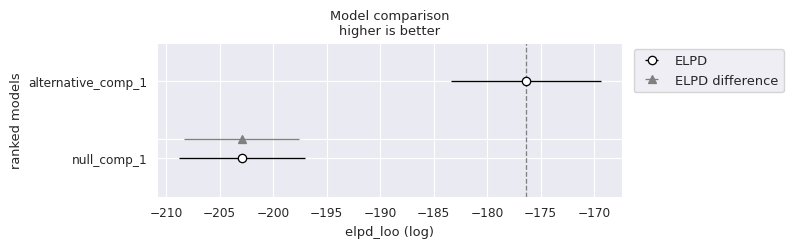

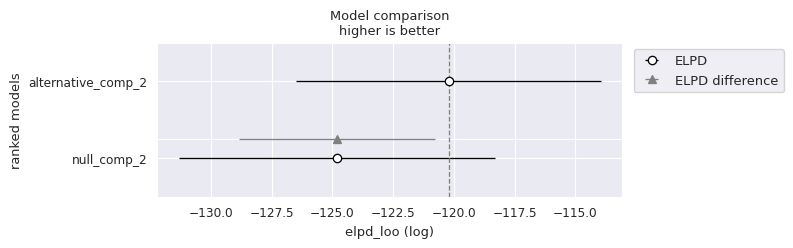

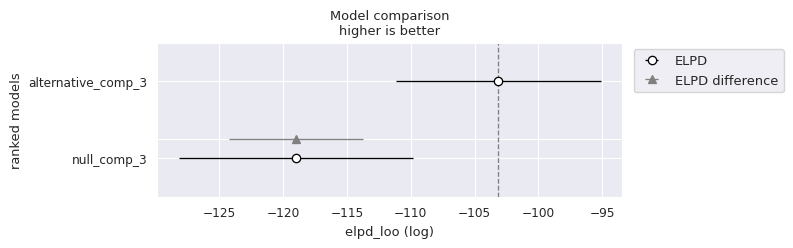

In [21]:
for plot in comp:
    az.plot_compare(model_comparisons[plot])

## Correlation co-efficents

In [22]:
for component in comp:
    print(component, 'AN', np.array(correlation_coeffients[component]['an_joint_posterior_distribution']).mean())
    print(component, 'HC', np.array(correlation_coeffients[component]['hc_joint_posterior_distribution']).mean())
    print(component, 'comp', np.array(correlation_coeffients[component]['comp_joint_posterior_distribution']).mean())

comp_1 AN 0.06153707629240757
comp_1 HC -0.012689500274983228
comp_1 comp 0.11626875795236996
comp_2 AN 0.11303377242910048
comp_2 HC -0.24996835620991145
comp_2 comp 0.1758595955057015
comp_3 AN -0.18207715028879443
comp_3 HC 0.34322466996833406
comp_3 comp 0.22335148456490048


In [23]:
for component in comp:
    prob = (correlation_coeffients[component]['an_joint_posterior_distribution'] ** 2 > correlation_coeffients[component]['hc_joint_posterior_distribution']  ** 2).mean().item()
    if prob > 0.5:
        print(f'Probability of AN joint posterior distribution > HC for {component} is ', prob * 100, '\n')
    if prob < 0.5:
         prob_max = (correlation_coeffients[component]['an_joint_posterior_distribution'] ** 2 < correlation_coeffients[component]['hc_joint_posterior_distribution']  ** 2).mean().item()
         print(f'Probability of HC joint posterior distribution > AN for {component} is ', prob_max * 100, '\n')

Probability of AN joint posterior distribution > HC for comp_1 is  82.39999999999999 

Probability of HC joint posterior distribution > AN for comp_2 is  79.5875 

Probability of HC joint posterior distribution > AN for comp_3 is  83.25 



Text(0, 0.5, 'AN')

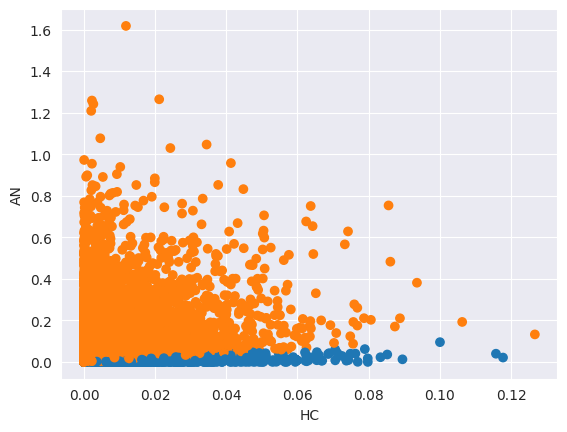

In [24]:
sq_partial_an_comp_1 = correlation_coeffients['comp_1']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_1 = correlation_coeffients['comp_1']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_1 > sq_partial_hc_comp_1, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_1, y=sq_partial_an_comp_1, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")

Text(0, 0.5, 'AN')

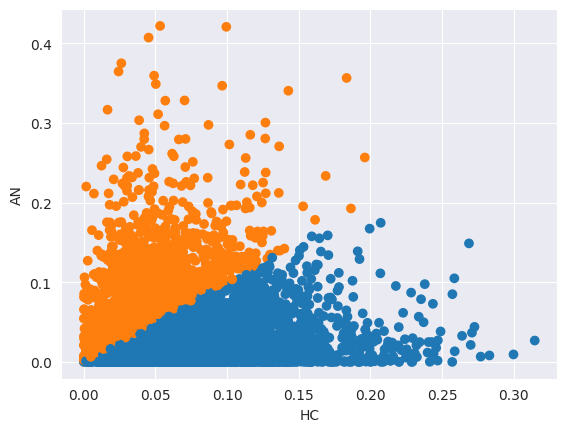

In [25]:
sq_partial_an_comp_2 = correlation_coeffients['comp_2']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_2 = correlation_coeffients['comp_2']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_2 > sq_partial_hc_comp_2, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_2, y=sq_partial_an_comp_2, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")

Text(0, 0.5, 'AN')

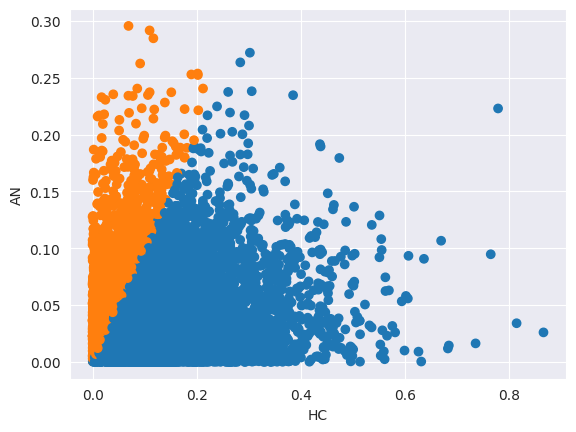

In [26]:
sq_partial_an_comp_3 = correlation_coeffients['comp_3']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_3 = correlation_coeffients['comp_3']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_3 > sq_partial_hc_comp_3, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_3, y=sq_partial_an_comp_3, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")

<AxesSubplot: title={'center': 'group'}>

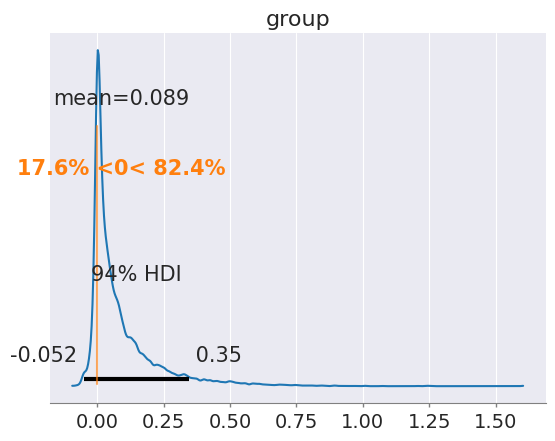

In [27]:
difference = sq_partial_an_comp_1 - sq_partial_hc_comp_1
az.plot_posterior(difference, ref_val=0 )